<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_5/blob/main/Tutorials/tutorial_3/1_clumpfinding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The ClumpFind Algorithm




## 1. ClumpFind Function:

In [1]:
# Get image from database
from skimage import data

# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# Label features in an array
from scipy.ndimage import label

In [2]:
# Function

def clumpfind(img_dat):

  # Define contours levels
  levels = [0.95*np.max(img_dat), 0.75*np.max(img_dat), 0.6*np.max(img_dat)]

  # Minimum # of pixels
  min_pix = 10

  # Empty list and define first clump ID
  clumps = []
  c_id   = 1

  # Empty labeled map
  img_lab = np.zeros_like(img_dat, dtype=int)

  # For loop over levels
  for level in sorted(levels):
    #print(level)

    # Create mask
    mask = img_dat >= level

    # Call label function from scipy.ndimage
    labeled, num_features = label(mask)

    # For loop
    for i in range(1, num_features + 1):

        # Define region
        region = (labeled == i)

        # Add if region smaller than min_pix
        if np.sum(region) < min_pix:
            continue

        # If there is no overlap
        if np.any(img_lab[region]):
            continue

        # Get labeled map
        img_lab[region] = c_id

        # Append to clumps list / find indices that are non-zero
        clumps.append(np.argwhere(region))

        # Add +1 to counter
        c_id += 1

  return img_lab


## 2. Mount Drive:

In [3]:
# Import libraries
from google.colab import drive

In [4]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive
#!mkdir epic5

/content/drive/MyDrive


In [6]:
%cd epic5
!ls -ltr

/content/drive/MyDrive/epic5
total 2406
drwx------ 2 root root    4096 Aug  5 17:55 FITS_files
-rw------- 1 root root 1260325 Aug  5 18:00 sample_img.png
-rw------- 1 root root 1198695 Aug  5 18:01 castellon-clouds-l2a.png


In [7]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt


## Read image 1:

In [8]:
# Get image from my Github repo:

!wget https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/sample_img.png

--2025-08-05 18:03:22--  https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/sample_img.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1260325 (1.2M) [image/png]
Saving to: ‘sample_img.png.1’

sample_img.png.1    100%[===================>]   1.20M  8.00MB/s    in 0.2s    

2025-08-05 18:03:22 (8.00 MB/s) - ‘sample_img.png.1’ saved [1260325/1260325]



In [9]:
image1 = cbook.get_sample_data("/content/drive/MyDrive/epic5/sample_img.png")

# New image object

image1 = plt.imread(image1)[:,:,1]

print(image1.shape, np.min(image1), np.max(image1))

(1080, 1080) 0.03137255 0.90588236


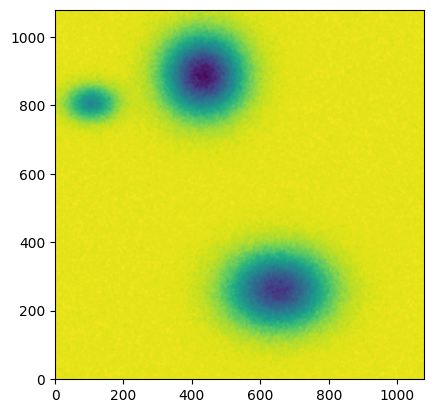

In [10]:
# Plotting figure

plt.figure()

plt.imshow(image1,  origin='lower')

plt.show()

## 3. Run clumpfind function:

In [11]:
# Labeled map 1
labeled1 = clumpfind(image1)

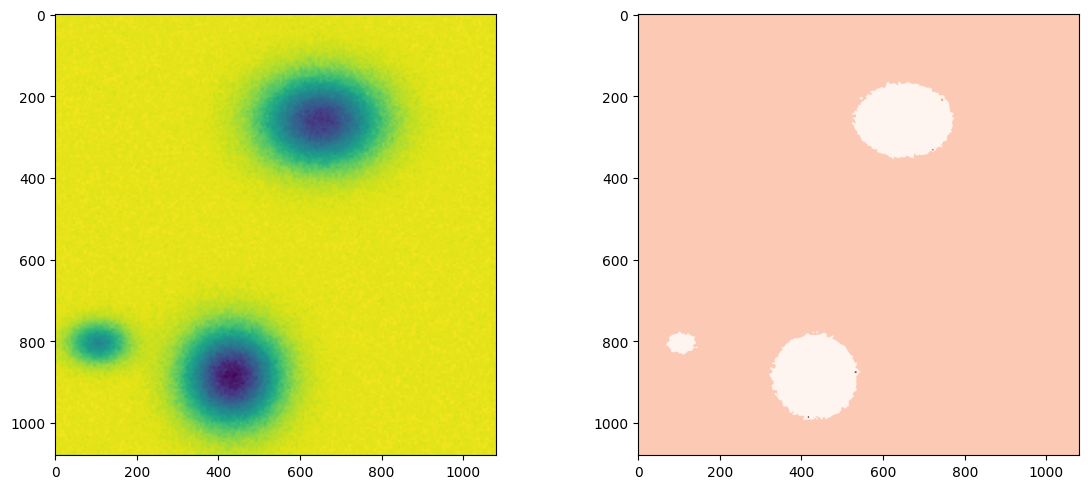

In [12]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(image1, cmap='viridis')

ax[1].imshow(labeled1, cmap='Reds')

plt.tight_layout()

plt.show()

## 4. Read image 2:

This image is taken from Scikit:

https://scikit-image.org/docs/stable/auto_examples/data/plot_scientific.html

In [13]:
# Get sample data from Scikit
image2= data.cell()

print("Image size is: ", image2.shape)

print("Min: ", np.min(image2), "Max:", np.max(image2))

# Define contours levels
#levels = [200, 150, 100, 50]

Image size is:  (660, 550)
Min:  0 Max: 255


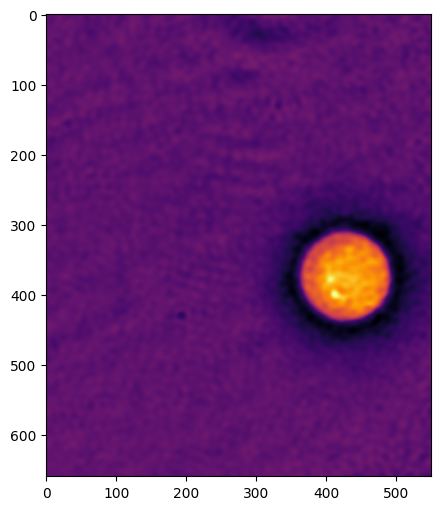

In [14]:
# Plot image

plt.figure(figsize = (8,6))

plt.imshow(image2, cmap = "inferno")

plt.show()

In [15]:
# Labeled map for image 2
labeled2 = clumpfind(image2)

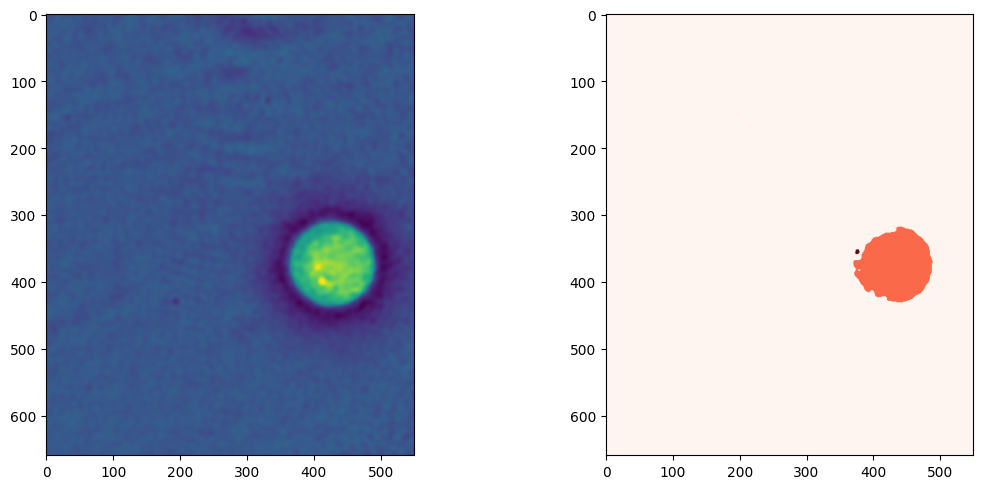

In [16]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(image2, cmap='viridis')

ax[1].imshow(labeled2, cmap='Reds')

plt.tight_layout()

plt.show()

## Read image 3:

- We will download a cloud image, which I took from:
https://element84.com/wp-content/uploads/2021/02/castellon-clouds-l2a.png

In [17]:
# Use wget

!wget https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/castellon-clouds-l2a.png

--2025-08-05 18:03:31--  https://raw.githubusercontent.com/wbandabarragan/physics-teaching-data/main/2D-data/castellon-clouds-l2a.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1198695 (1.1M) [image/png]
Saving to: ‘castellon-clouds-l2a.png.1’

castellon-clouds-l2 100%[===================>]   1.14M  --.-KB/s    in 0.07s   

2025-08-05 18:03:31 (16.6 MB/s) - ‘castellon-clouds-l2a.png.1’ saved [1198695/1198695]



In [18]:
!ls -ltr

total 4808
drwx------ 2 root root    4096 Aug  5 17:55 FITS_files
-rw------- 1 root root 1260325 Aug  5 18:00 sample_img.png
-rw------- 1 root root 1198695 Aug  5 18:01 castellon-clouds-l2a.png
-rw------- 1 root root 1260325 Aug  5 18:03 sample_img.png.1
-rw------- 1 root root 1198695 Aug  5 18:03 castellon-clouds-l2a.png.1


## Get image in memory:

In [19]:
# Use cookbook:
image3 = cbook.get_sample_data("/content/drive/MyDrive/epic5/castellon-clouds-l2a.png")

# New image object

image3 = plt.imread(image3)

print(image3.shape)

(720, 815, 3)


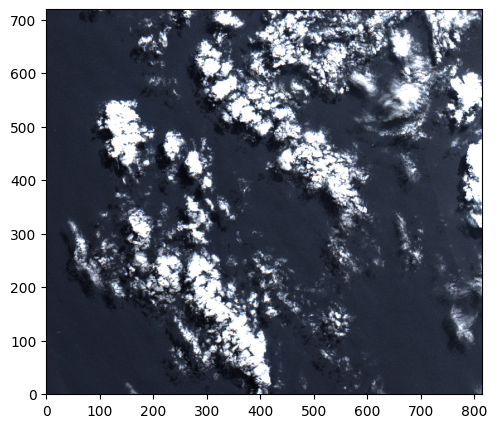

In [20]:
# Plot image

plt.figure(figsize = (6,5))

plt.imshow(image3, cmap = "inferno", origin='lower')

plt.show()

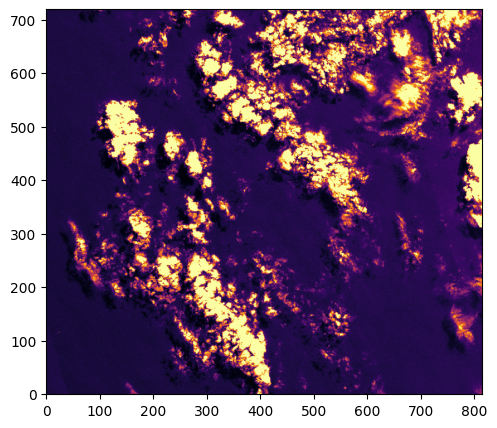

In [21]:
# Plot image

plt.figure(figsize = (6,5))

plt.imshow(image3[:,:,0], cmap = "inferno", origin='lower')

plt.show()

In [22]:
# Get one channel only
image3 = image3[:,:,0]

print(np.min(image3), np.max(image3))

0.015686275 1.0


In [23]:
# Define contours levels
#levels = [0.8, 0.6, 0.4, 0.2]

labeled3 = clumpfind(image3)

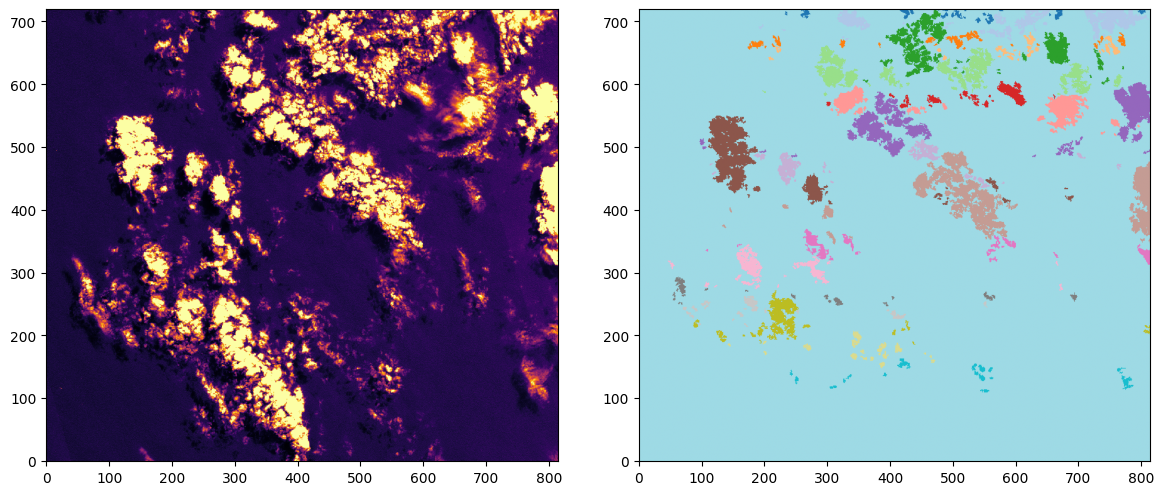

In [24]:
# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].imshow(image3, cmap='inferno', origin='lower')

ax[1].imshow(labeled3, cmap='tab20_r', origin='lower')

plt.tight_layout()

plt.show()